***A High-Accuracy Rotation Estimation
Algorithm Based on 1D Phase-Only Correlation***

**Basic Principle of Image Rotation Estimation**
The problem considered here is to
estimate the rotation angle θ between two images that are translated and  rotated each other. For estimating the image rotation, we employ the polar mapping of the amplitude spectrum to convert the image rotation into the image translation. Note that the amplitude spectra are not affected by the image shifts, and are rotated with respect to each other at the origin of the spatial frequencies by the same angle as their spatial domain counterparts. The use of polar mapping, we can easily estimate the rotation angle θ.

**Input**\
images f(n1, n2) and g(n1, n2)\
**Output**\
relative rotation angle θ between f(n1, n2) and g(n1, n2)\
**Step 1**\
Calculate 2D DFTs of the discrete images f(n1, n2) and g(n1, n2) to obtain F(k1, k2) and G(k1, k2), where we assume that the index ranges are n1 =
−M, ··· , M, n2 = −M, ··· , M, k1 = −M, ··· , M and k2 = −M, ··· , M. The image size is N × N (N = 2M +1). In order to reduce the effect of discontinuity at images border, we also apply 2D Hanning window to the input images f(n1, n2)
and g(n1, n2).\
**Step 2**\
Calculate the amplitude spectra |F(k1, k2)| and |G(k1, k2)|. For natural images, most energy is concentrated in low-frequency domain. Hence, we had better
to use log{|F(k1, k2)|+1} and log{|G(k1, k2)|+1} instead of |F(k1, k2)|and |G(k1, k2)|.\
**Step 3**\
Calculate the polar mappings FP (l1, l2) and GP (l1, l2) of log{|F(k1, k2)| + 1}
and log{|G(k1, k2)| + 1} (Fig. 1 (d)), where the index ranges of the transformed
image are l1 = −M, ··· , M and l2 = −M, ··· , M.\
**Step 4**\
Estimate the image displacement between FP (l1, l2) and GP (l1, l2) using the
2D POC function to obtain the rotation angle θ, where the displacement in the
horizontal direction (l2 direction) corresponds to the image rotation.


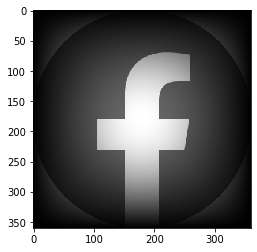

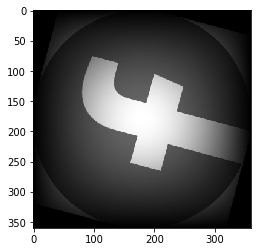

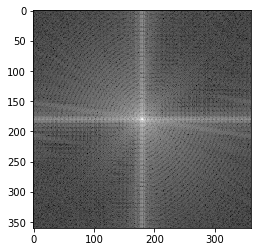

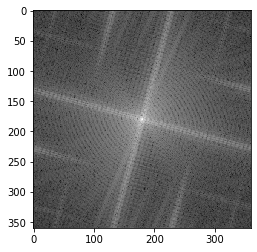

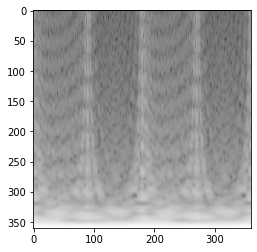

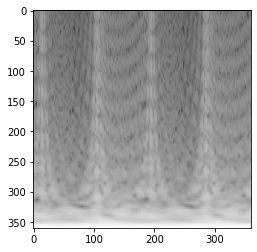

In [54]:
#basic visualisation

import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import sys
from scipy import optimize
np.set_printoptions(threshold=sys.maxsize)
r = []
rindex = []
alphavals = []
rnew = []
thetasol = []
testtheta = 75
final_rindex = []

img1 = cv2.imread('./input images/figure1.png',0)
img1 = cv2.resize(img1,(360,360))

shape = img1.shape
cx,cy = img1.shape

M = cv2.getRotationMatrix2D((cx/2,cy/2), testtheta, 1)
rotated = cv2.warpAffine(img1, M, (cx, cy))
# rotated = imutils.rotate(img1, testtheta)
# rotated = cv2.resize(rotated,(360,360))

hanw = cv2.createHanningWindow((cx,cy),cv2.CV_64F)
img1 = img1 * hanw
rotated = rotated * hanw

f1 = np.fft.fft2(img1)
fshift1 = np.fft.fftshift(f1)

f2 = np.fft.fft2(rotated)
fshift2 = np.fft.fftshift(f2)

magnitude_spectrum1 = np.log(np.abs(fshift1) +1)
polar_map1= cv2.linearPolar(magnitude_spectrum1, (cy/2,cx/2), cx/np.log(cx), flags=cv2.INTER_LINEAR+cv2.WARP_FILL_OUTLIERS)

magnitude_spectrum2 = np.log(np.abs(fshift2) +1)
polar_map2= cv2.linearPolar(magnitude_spectrum2, (cy/2,cx/2), cx/np.log(cx), flags=cv2.INTER_LINEAR+cv2.WARP_FILL_OUTLIERS)

M90 = cv2.getRotationMatrix2D((cx/2,cy/2), 90, 1)
polar_map1 = cv2.warpAffine(polar_map1, M90, (cx, cy))
polar_map2 = cv2.warpAffine(polar_map2, M90, (cx, cy))

plt.figure()
plt.imshow(img1, cmap="gray")
plt.figure()
plt.imshow(rotated, cmap="gray")

plt.figure()
plt.imshow(magnitude_spectrum1, cmap="gray")
plt.figure()
plt.imshow(magnitude_spectrum2, cmap="gray")

plt.figure()
plt.imshow(polar_map1, cmap="gray")
plt.figure()
plt.imshow(polar_map2, cmap="gray")

75


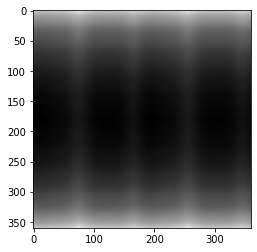

In [65]:
#code for 2d POC based Image registration
def phase_corr_2D(im1, im2):
    c = (np.fft.ifft2(np.fft.fft2(im1)*np.fft.ifft2(im2))).real
    dy,dx = np.unravel_index(c.argmax(), c.shape)
    return dx

theta = phase_corr_2D(polar_map1, polar_map2)
print(theta)
plt.figure()
plt.imshow(c, cmap="gray")

**1-Dimensional Phase-Only Correlation (1D POC)**\
Consider two 1D image signals, f(n) and g(n), where we assume that the index
range is n = −M, ··· , M for mathematical simplicity, and hence the signal length is N = 2M +1. The discussion could be easily generalized to non-negative index ranges with power-of-two signal length. Let F(k) and G(k) denote the Discrete Fourier Transforms (DFTs) of the two signals. F(k) and G(k) are given by :
\begin{aligned} F(k) &=\sum_{n=-M}^{M} f(n) W_{N}^{k n}=A_{F}(k) e^{j \theta_{F}(k)} \\ G(k) &=\sum_{n=-M}^{M} g(n) W_{N}^{k n}=A_{G}(k) e^{j \theta_{G}(k)} \end{aligned}

The cross-phase spectrum (or normalized cross spectrum) R(k) is defined as

\begin{aligned}
R(k)=\frac{F(k) \overline{G(k)}}{|F(k) \overline{G(k)}|}=e^{j \theta(k)}
\end{aligned}

The POC function r(n) is the Inverse Discrete Fourier Transform (IDFT) of
R(k) and is given by:

\begin{aligned}
r(n)=\frac{1}{N} \sum_{k=-M}^{M} R(k) W_{N}^{-k n}
\end{aligned}

If there is a similarity between two signals, the POC function gives a distinct
sharp peak. (When f(n) = g(n), the POC function becomes the Kronecker delta
function.) If not, the peak drops significantly. The height of the peak can be used as a good similarity measure for signal matching, and the location of the peak shows the translational displacement between the two signals.\

Now consider fc(t) as a signal defined in continuous space with a real number
index t. Let δ represent a displacement of fc(t). So, the displaced signal can be represented as fc(t−δ). Assume that f(n) and g(n) are spatially sampled signals of fc(t) and fc(t − δ), and are defined as

\begin{aligned}
f(n)=\left.f_{c}(t)\right|_{t=n T}\\
g(n)=\left.f_{c}(t - \delta)\right|_{t=n T}
\end{aligned}

where T is the sampling interval and the index range is given by n = −M, ··· , M. For simplicity, we assume T = 1. The cross-phase spectrum R(k) and the POC
function r(n) between f(n) and g(n) will be given by

\begin{aligned} 
R(k) &=\frac{F(k) \overline{G(k)}}{|F(k) \overline{G(k)}|} \simeq e^{j \frac{2 \pi}{N} k \delta} \\ r(n) &=\frac{1}{N} \sum_{k=-M}^{M} R(k) W_{N}^{-k n} \\ & \simeq \frac{\alpha}{N} \frac{\sin \{\pi(n+\delta)\}}{\sin \left\{\frac{\pi}{N}(n+\delta)\right\}} 
\end{aligned}
For the signal matching task, we evaluate the similarity between the two signals by the peak value α, and estimate the displacement by the peak position δ.

In [3]:
//1d POC code and plots

SyntaxError: invalid syntax (<ipython-input-3-345fae75bb4d>, line 1)

**Rotation Estimation Algorithm Using 1D Phase-Only Correlation**\
We now need to formulate the rotation estimation algorithm using a 1D POC function. The image rotation is represented as horizontal displacements between two polar mappings. The problem of rotation estimation is replaced to 1D displacement estimation between row lines in two polar mappings. The use of 1D POC function makes it possible to reduce the computational cost significantly for estimating the rotation angle.\
To estimate the rotation angle θ, we calculate 1D POC functions for every pairs
of row lines in two polar mappings, and then summarize all 1D POC functions
to obtain θ. In the calculation of 1D POC functions, we need to use only the
effective lines (effective frequency bands), since the amplitude spectra include
meaningless frequency components for image rotation. The proposed algorithm
consists of two steps: (i) effective line extraction and (ii) rotation estimation using 1D POC. The followings are detailed procedures for the proposed algorithm.

In [ ]:
Code to plt the ground truth image 

In [ ]:
Code to plt the rotated image


**(i) Effective line extraction**\
**Input**\
registered image f(n1, n2)\
**Output**\
indices l of effective lines\
**Step 1**\
Generate the rotated image f(n1, n2) by rotating the registered image
f(n1, n2) by Θ degree, where Θ = 30 in this paper.\
**Step 2**\
Calculate the polar mappings FP (l1, l2) and FP (l1, l2) of f(n1, n2) and f(n1, n2), respectively.\
**Step 3**\
Extract 1D image signals ul1 (l2) and u
l1 (l2) in the horizontal direction (l2
direction) from FP (l1, l2) and FP (l1, l2), respectively, as shown in Fig. 3. Next, we calculate the 1D POC functions rl1 (l2) between ul1 (l2) and ul1 (l2), and obtain the displacement δl1 and the correlation peak value αl1 . The number of 1D POC functions is N.\
**Step 4**\
Select indices l by comparing between δl1 and Θ as follows:
l = {l1 : |δl1 − NΘ/π| < δth, −M ≤ l1 ≤ M}, where δth = 1 in this paper. Note that NΘ/π indicates the displacement between two polar mappings which is equivalent to the rotation angle Θ.\
**Step 5**\
Update the indices l by extracting upper half of the correlation peak value
αi.\

In [ ]:
//line selection

\
**(ii) Rotation estimation using 1D POC function**\
**Input**\
registered image f(n1, n2), input image g(n1, n2) and indices l of effective
lines\
**Output**\
rotation angle θ\
**Step 1**\
Calculate the polar mappings FP (l1, l2) and GP (l1, l2) of f(n1, n2) and
g(n1, n2), respectively.\
**Step 2**\
Extract 1D image signals ul1 (l2) and vl1 (l2) in the horizontal direction (l2
direction) from FP (l1, l2) and GP (l1, l2), respectively, where l1 ∈ l. Next, we calculate the 1D POC functions rl1 (l2) between ul1 (l2) and vl1 (l2), where the number of 1D POC functions equals to the number of effective lines.\
**Step 3**\
Calculate the average of all 1D POC functions rl1 (l2), which denotes rall(l2)
(Fig. 5). Next, we obtain the displacement δ from the peak location of the
averaged 1D POC function rall(l2). Then, we calculate the rotation angle θ as
θ = δπ/N.\

In [ ]:
//rotation estimation 